In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
baseDP = pd.read_csv("C:/Users/conta/Desktop/Projeto-Dash-PY-JS/BaseDPEvolucaoMensalCisp.csv", sep=";", encoding='Latin1')

In [4]:
baseDP.isna().sum()

cisp                         0
mes                          0
ano                          0
mes_ano                      0
aisp                         0
                            ..
encontro_ossada              0
pol_militares_mortos_serv    0
pol_civis_mortos_serv        0
registro_ocorrencias         0
fase                         0
Length: 63, dtype: int64

In [6]:
baseDP.head(10)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
5,9,1,2003,2003m01,2,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,36,3,0,0,0,0,554,3
6,10,1,2003,2003m01,2,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,40,2,3,0,0,0,593,3
7,12,1,2003,2003m01,19,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,48,3,0,0,0,0,620,3
8,13,1,2003,2003m01,19,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,26,1,0,0,0,0,455,3
9,14,1,2003,2003m01,23,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,43,2,2,0,0,0,636,3


In [7]:
baseDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35670 entries, 0 to 35669
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cisp                        35670 non-null  int64  
 1   mes                         35670 non-null  int64  
 2   ano                         35670 non-null  int64  
 3   mes_ano                     35670 non-null  object 
 4   aisp                        35670 non-null  int64  
 5   risp                        35670 non-null  int64  
 6   munic                       35670 non-null  object 
 7   mcirc                       35670 non-null  int64  
 8   regiao                      35670 non-null  object 
 9   hom_doloso                  35670 non-null  int64  
 10  lesao_corp_morte            35670 non-null  int64  
 11  latrocinio                  35670 non-null  int64  
 12  cvli                        35670 non-null  int64  
 13  hom_por_interv_policial     356

In [8]:
baseDP['mes_ano'] = baseDP['mes_ano'].astype(str).str.replace('m', '-')

In [9]:
baseDP['ano'] = pd.to_datetime(baseDP['ano'], format='%Y')
baseDP['mes_ano'] = pd.to_datetime(baseDP['mes_ano'], format='%Y-%m')

In [10]:
baseDP['ano'] = baseDP['ano'].dt.year

In [11]:
baseDP = baseDP.drop(columns=['cmp', 'mes', 'total_furtos', 'total_roubos'])

In [12]:
baseDP['Todos_roubos'] = baseDP[['roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo', 'roubo_carga', 'roubo_residencia', 'roubo_comercio', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque', 'outros_roubos']].sum(axis=1)
baseDP['Todos_furtos'] = baseDP[['furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'outros_furtos']].sum(axis=1)

In [13]:
baseDP.head(10)

,cisp,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,...,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,Todos_roubos,Todos_furtos
0,1,2003,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,0,0,...,21,2,0,0,0,0,578,3,166.0,169
1,4,2003,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,15,6,0,1,0,0,441,3,133.0,115
2,5,2003,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,47,2,1,0,0,0,637,3,187.0,216
3,6,2003,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,6,0,...,26,2,1,0,0,0,473,3,199.0,90
4,7,2003,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,4,0,...,10,1,3,0,0,0,147,3,60.0,35
5,9,2003,2003-01-01,2,1,Rio de Janeiro,3304557,Capital,1,1,...,36,3,0,0,0,0,554,3,168.0,268
6,10,2003,2003-01-01,2,1,Rio de Janeiro,3304557,Capital,1,0,...,40,2,3,0,0,0,593,3,165.0,290
7,12,2003,2003-01-01,19,1,Rio de Janeiro,3304557,Capital,2,0,...,48,3,0,0,0,0,620,3,178.0,256
8,13,2003,2003-01-01,19,1,Rio de Janeiro,3304557,Capital,0,0,...,26,1,0,0,0,0,455,3,113.0,217
9,14,2003,2003-01-01,23,1,Rio de Janeiro,3304557,Capital,0,0,...,43,2,2,0,0,0,636,3,160.0,311


In [14]:
baseDP['Todos_roubos'] = baseDP['Todos_roubos'].astype(int)

In [15]:
baseDP['ano'] = pd.to_datetime(baseDP['ano'], format='%Y')

In [16]:
'''baseDP = pd.to_datetime(baseDP['mes_ano']).dt.month'''

"baseDP = pd.to_datetime(baseDP['mes_ano']).dt.month"

In [17]:
baseDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35670 entries, 0 to 35669
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cisp                        35670 non-null  int64         
 1   ano                         35670 non-null  datetime64[ns]
 2   mes_ano                     35670 non-null  datetime64[ns]
 3   aisp                        35670 non-null  int64         
 4   risp                        35670 non-null  int64         
 5   munic                       35670 non-null  object        
 6   mcirc                       35670 non-null  int64         
 7   regiao                      35670 non-null  object        
 8   hom_doloso                  35670 non-null  int64         
 9   lesao_corp_morte            35670 non-null  int64         
 10  latrocinio                  35670 non-null  int64         
 11  cvli                        35670 non-null  int64     

In [19]:
'''Qual é a distribuição de crimes violentos (hom_doloso, lesao_corp_morte, latrocinio) ao longo dos meses (mes) e anos (ano)?'''

crimes_violentos = baseDP[['hom_doloso', 'lesao_corp_morte', 'latrocinio']]

resultado1 = crimes_violentos.groupby([baseDP['ano'], baseDP['mes_ano']]).sum()

print(resultado1)

                       hom_doloso  lesao_corp_morte  latrocinio
ano        mes_ano                                             
2003-01-01 2003-01-01         589                 6          20
           2003-02-01         583                 4          12
           2003-03-01         613                 5          16
           2003-04-01         585                11          14
           2003-05-01         599                 6          20
...                           ...               ...         ...
2024-01-01 2024-09-01         226                 7           8
           2024-10-01         230                 5          13
           2024-11-01         252                 5           9
           2024-12-01         304                13          10
2025-01-01 2025-01-01         312                10           6

[265 rows x 3 columns]


In [20]:
'''Há valores faltantes nas colunas de crimes violentos? Como tratá-los?'''
crimes_violentos.isna().sum()

hom_doloso          0
lesao_corp_morte    0
latrocinio          0
dtype: int64

In [21]:
'''Qual é a proporção de crimes contra o patrimônio (Todos_roubos, Todos_furtos) em relação aos crimes violentos?'''

soma_crimes_patrimonio = baseDP[['Todos_roubos', 'Todos_furtos']].sum().sum()

soma_crimes_violentos = baseDP[['hom_doloso', 'lesao_corp_morte', 'latrocinio']].sum().sum()

resultado2 = soma_crimes_patrimonio / soma_crimes_violentos

print(f'A proporção de crimes contra o patrimônio em relação aos crimes violentos é: {resultado2:.2f}')

A proporção de crimes contra o patrimônio em relação aos crimes violentos é: 74.05


In [22]:
'''Agrupe os dados por risp e calcule a média de hom_por_interv_policial. Qual risp tem a maior média?'''

media_hom_por_interv_policial = baseDP.groupby('risp')['hom_por_interv_policial'].mean()

risp_maior_media = media_hom_por_interv_policial.idxmax()
maior_media = media_hom_por_interv_policial.max()

print(f'A RISP com a maior média de hom_por_interv_policial é: {risp_maior_media} com uma média de {maior_media:.2f}')

A RISP com a maior média de hom_por_interv_policial é: 2 com uma média de 1.41


In [23]:
'''Agrupe os dados por munic e calcule a soma de furto_celular. Qual município tem o maior número de furto_celular?'''

soma_roubo_bic_munic = baseDP.groupby('munic')['furto_celular'].sum()

munic_mais_roubos = soma_roubo_bic_munic.idxmax()  #idxmax retorna o INDÍCE do maior valor

print(f'O município que tem o maior número de furto_celular é: {munic_mais_roubos}')

O município que tem o maior número de furto_celular é: Rio de Janeiro


In [24]:
'''Qual é o município (munic) com o maior número de homicídios dolosos (hom_doloso) em um ano específico?'''

ano_especifico = 2023
ano_filtro = baseDP[baseDP['ano'] == ano_especifico]

soma_munic_hom_doloso = baseDP.groupby('munic')['hom_doloso'].sum()

munic_mais_hom_doloso = soma_munic_hom_doloso.idxmax()
quantidade_max_homicidios = soma_munic_hom_doloso.max()

print(f'O ano com mais homícidios doloso foi em {ano_especifico} no munícipio do {munic_mais_hom_doloso} com total de {quantidade_max_homicidios}.')

O ano com mais homícidios doloso foi em 2023 no munícipio do Rio de Janeiro com total de 34618.


In [25]:
'''Qual região (regiao) tem a maior taxa de roubos de celulares (roubo_celular) por habitante?

roubo_celular_por_regiao = baseDP.groupby('regiao')['roubo_celular'].sum()

populacao_por_regiao = populacao_munic_IBGE.groupby('munic')['Quantidade'].sum()

taxa_roubo_celular_por_habitante = roubo_celular_por_regiao / populacao_por_regiao

regiao_maior_taxa = taxa_roubo_celular_por_habitante.idxmax()
maior_taxa = taxa_roubo_celular_por_habitante.max()

print(f'A região com a maior taxa de roubos de celulares por habitante é: {regiao_maior_taxa} com uma taxa de {maior_taxa:.2f}')'''

"Qual região (regiao) tem a maior taxa de roubos de celulares (roubo_celular) por habitante?\n\nroubo_celular_por_regiao = baseDP.groupby('regiao')['roubo_celular'].sum()\n\npopulacao_por_regiao = populacao_munic_IBGE.groupby('munic')['Quantidade'].sum()\n\ntaxa_roubo_celular_por_habitante = roubo_celular_por_regiao / populacao_por_regiao\n\nregiao_maior_taxa = taxa_roubo_celular_por_habitante.idxmax()\nmaior_taxa = taxa_roubo_celular_por_habitante.max()\n\nprint(f'A região com a maior taxa de roubos de celulares por habitante é: {regiao_maior_taxa} com uma taxa de {maior_taxa:.2f}')"

In [26]:
'''Como a quantidade de apreensões de drogas (apreensao_drogas) varia ao longo dos anos (ano)?'''

apreensao_drogas_por_ano = baseDP.groupby('ano')['apreensao_drogas'].sum()

print("Variação entre 2009 e 2015 é o que chama mais atenção. Saindo de patamares baixos (10990 apreensões) para niveis bastante altos (28089 apreensões)")
print(apreensao_drogas_por_ano)

Variação entre 2009 e 2015 é o que chama mais atenção. Saindo de patamares baixos (10990 apreensões) para niveis bastante altos (28089 apreensões)
ano
2003-01-01    13350
2004-01-01    12007
2005-01-01    11761
2006-01-01    11087
2007-01-01     9945
2008-01-01     9437
2009-01-01    10990
2010-01-01    12545
2011-01-01    15273
2012-01-01    18690
2013-01-01    23227
2014-01-01    26933
2015-01-01    28089
2016-01-01    25016
2017-01-01    21312
2018-01-01    21626
2019-01-01    22749
2020-01-01    20790
2021-01-01    21682
2022-01-01    20641
2023-01-01    22522
2024-01-01    23930
2025-01-01     2117
Name: apreensao_drogas, dtype: int64


In [27]:
'''Qual é a correlação entre roubo_veiculo e furto_veiculos?'''

correlacao_roubo_furto_veiculos = baseDP['roubo_veiculo'].corr(baseDP['furto_veiculos'])

print(f'A correlação entre roubos e furtos de veículos está com variação de {correlacao_roubo_furto_veiculos:.2f}')

A correlação entre roubos e furtos de veículos está com variação de 0.60


In [28]:
baseDP.head()

,cisp,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,...,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,Todos_roubos,Todos_furtos
0,1,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,0,0,...,21,2,0,0,0,0,578,3,166,169
1,4,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,15,6,0,1,0,0,441,3,133,115
2,5,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,47,2,1,0,0,0,637,3,187,216
3,6,2003-01-01,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,6,0,...,26,2,1,0,0,0,473,3,199,90
4,7,2003-01-01,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,4,0,...,10,1,3,0,0,0,147,3,60,35


In [29]:
'''Qual é a média de registro_ocorrencias por mês (mes) em cada região (regiao)?'''

media_registro_ocorrencias_por_regiao = baseDP.groupby(['regiao', 'mes_ano'])['registro_ocorrencias'].mean()

cinco_maiores_medias = media_registro_ocorrencias_por_regiao.nlargest(10)

print("Seleção das dez maiores média de registros de ocorrencias por mês em cada região")
print(cinco_maiores_medias)

Seleção das dez maiores média de registros de ocorrencias por mês em cada região
regiao   mes_ano   
Capital  2025-01-01    1007.609756
         2024-05-01     992.853659
         2024-09-01     964.951220
         2024-08-01     964.195122
         2024-10-01     958.439024
         2024-04-01     957.195122
         2024-12-01     951.463415
         2024-01-01     935.951220
         2024-02-01     934.878049
         2024-03-01     923.341463
Name: registro_ocorrencias, dtype: float64


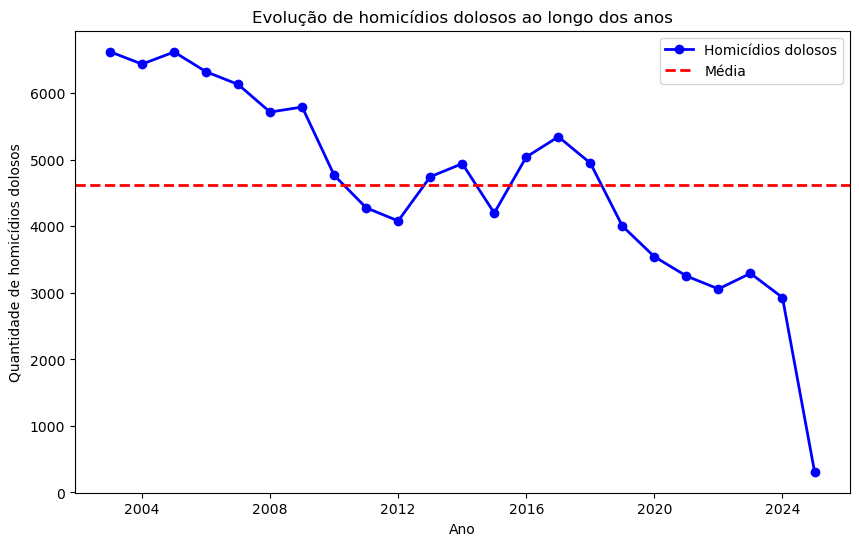

In [30]:
'''Crie um gráfico de linha mostrando a evolução de hom_doloso ao longo dos anos (ano).'''

'''
marker='o': Define o estilo do marcador que será usado para marcar os pontos de dados no gráfico. 
Neste caso, 'o' representa um círculo. No seu código, parece que há um erro de digitação com '0', que deve ser 'o'.

color='b': Define a cor da linha do gráfico. 'b' representa a cor azul.

linestyle='-': Define o estilo da linha do gráfico. '-' representa uma linha sólida.

linewidth=2: Define a largura da linha do gráfico. 2 representa uma linha com espessura de 2 pontos.
'''

evolucao_hom_doloso = baseDP.groupby('ano')['hom_doloso'].sum()
media_hom_doloso = evolucao_hom_doloso.mean()

plt.figure(figsize=(10,6))
plt.plot(evolucao_hom_doloso.index, evolucao_hom_doloso.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.axhline(y=media_hom_doloso, color='r', linestyle='--', linewidth=2, label='Média')

plt.title("Evolução de homicídios dolosos ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Quantidade de homicídios dolosos")
plt.legend(['Homicídios dolosos', 'Média'])

plt.show()

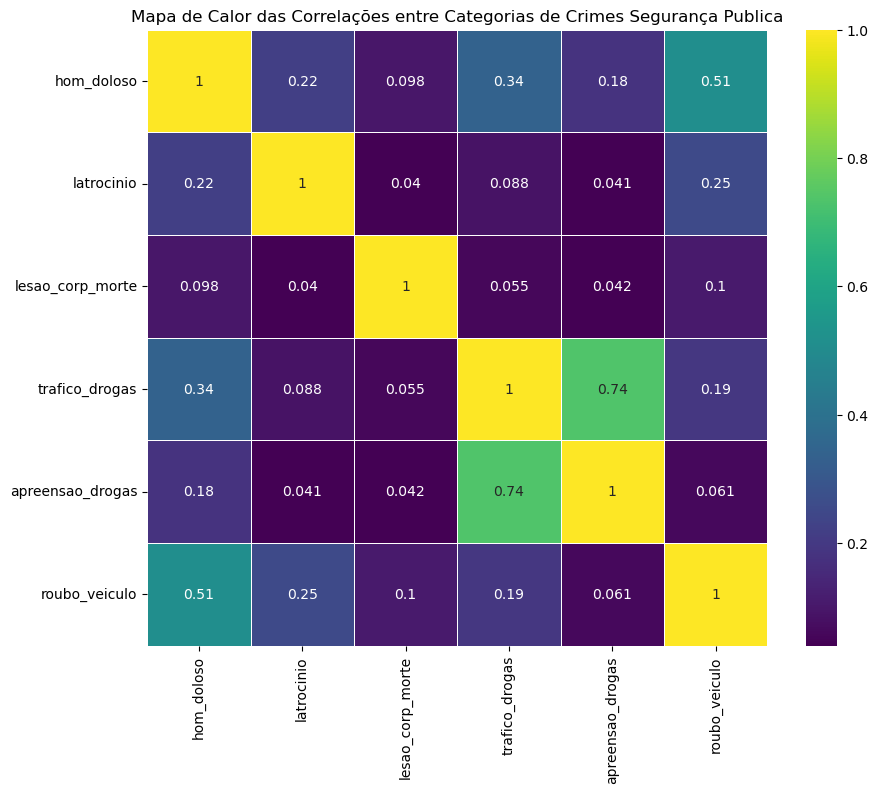

In [31]:
'''Crie um mapa de calor (heatmap) para visualizar a correlação entre as principais categorias de crimes.'''

correlacao = baseDP[['hom_doloso', 'latrocinio', 'lesao_corp_morte','trafico_drogas', 'apreensao_drogas', 'roubo_veiculo']].corr()

sns.set_palette("viridis")

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Mapa de Calor das Correlações entre Categorias de Crimes Segurança Publica')
plt.show()

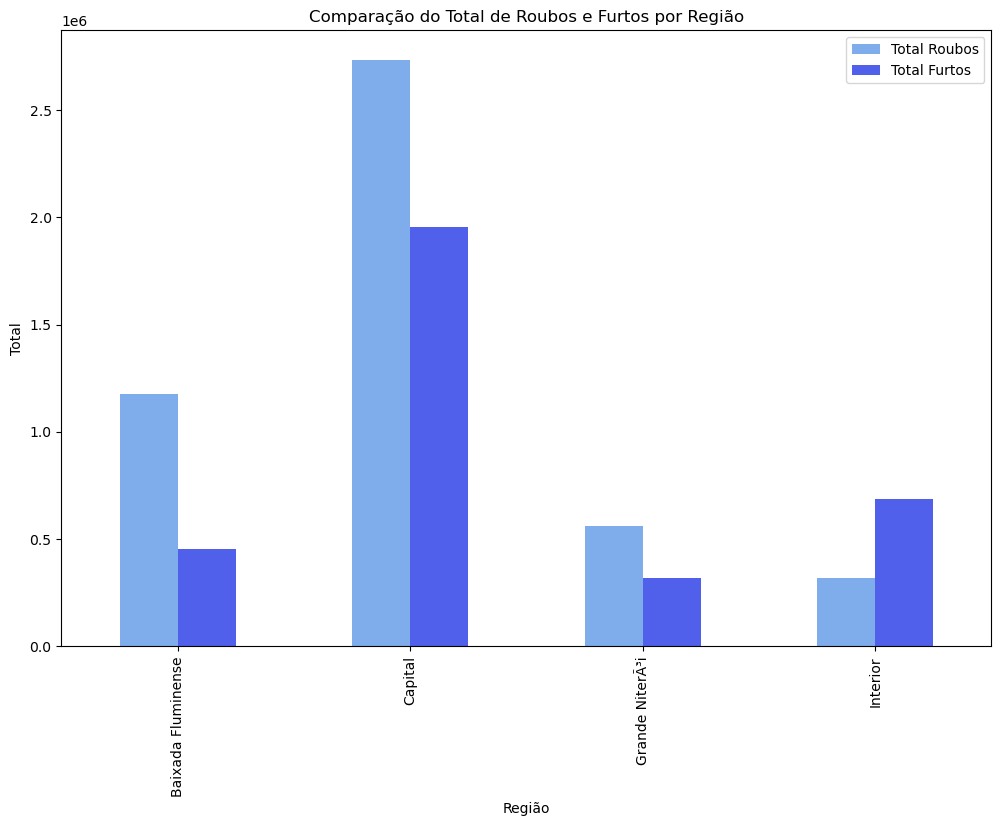

In [32]:
'''Faça um gráfico de barras comparando total_roubos e total_furtos por região (regiao).'''

comparacao_roubos_furtos_regiao = baseDP.groupby('regiao')[['Todos_roubos', 'Todos_furtos']].sum()

comparacao_roubos_furtos_regiao.plot(kind='bar', figsize=(12, 8), color=['#7FACEA', '#5060EA'])

plt.title('Comparação do Total de Roubos e Furtos por Região')
plt.xlabel('Região')
plt.ylabel('Total')
plt.legend(['Total Roubos', 'Total Furtos'])

plt.show()


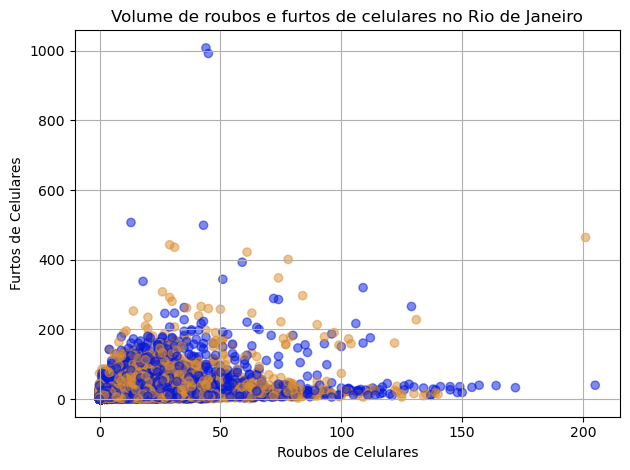

In [33]:
'''Crie um gráfico de dispersão entre roubo_celular e furto_celular para identificar possíveis padrões.'''

fig, ax = plt.subplots()
colors = np.tile(['#DB8D2C', '#0117E1'], len(baseDP) // 2 + 1)[:len(baseDP)]
ax.scatter(baseDP['roubo_celular'], baseDP['furto_celular'], c=colors, alpha=0.5)

ax.set_title('Volume de roubos e furtos de celulares no Rio de Janeiro')
ax.set_xlabel('Roubos de Celulares')
ax.set_ylabel('Furtos de Celulares')

ax.grid(True)
fig.tight_layout()

plt.show()

In [34]:
baseDP['somente_ano'] = pd.to_datetime(baseDP['ano']).dt.year

In [35]:
baseDP['mes'] = pd.to_datetime(baseDP['mes_ano']).dt.month

C:\Users\conta\AppData\Local\Temp\ipykernel_7960\1405907747.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


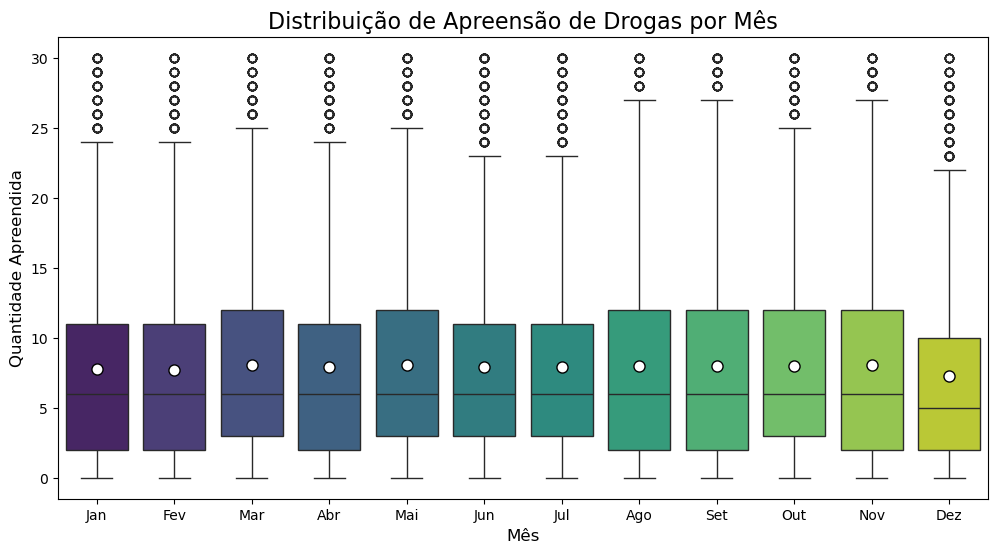

In [36]:
'''Visualize a distribuição de apreensao_drogas por mês (mes) usando um gráfico de boxplot'''


def remove_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]


limpeza = remove_outliers(baseDP, 'apreensao_drogas')

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='mes',
    y='apreensao_drogas',
    data=limpeza,
    palette="viridis",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black", "markersize": "8"}
)

plt.title('Distribuição de Apreensão de Drogas por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Quantidade Apreendida', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

plt.show()

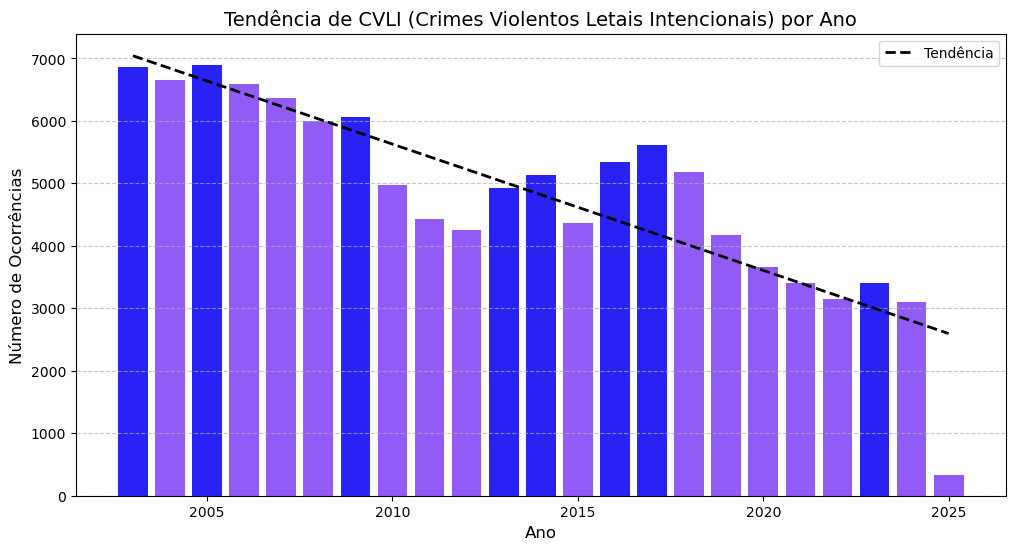

In [37]:
'''Há uma tendência de aumento ou redução em cvli (Crimes Violentos Letais Intencionais) ao longo dos anos?'''

cvli_agrup_anos = baseDP.groupby('somente_ano')['cvli'].sum().reset_index()

plt.figure(figsize=(12, 6))

cores = np.where(cvli_agrup_anos['cvli'].diff().fillna(0) >= 0, '#2922F5', '#925BF5')  
plt.bar(cvli_agrup_anos['somente_ano'], cvli_agrup_anos['cvli'], color=cores)

z = np.polyfit(cvli_agrup_anos['somente_ano'], cvli_agrup_anos['cvli'], 1)
p = np.poly1d(z)
plt.plot(cvli_agrup_anos['somente_ano'], p(cvli_agrup_anos['somente_ano']), "k--", linewidth=2, label='Tendência')

plt.title("Tendência de CVLI (Crimes Violentos Letais Intencionais) por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Ocorrências", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [38]:
'''Qual é o mês (mes) com o maior número de ocorrências de roubo_em_coletivo?'''

mes_maior_ocorre_roubo_coletivo = baseDP.groupby('mes')['roubo_em_coletivo'].sum()


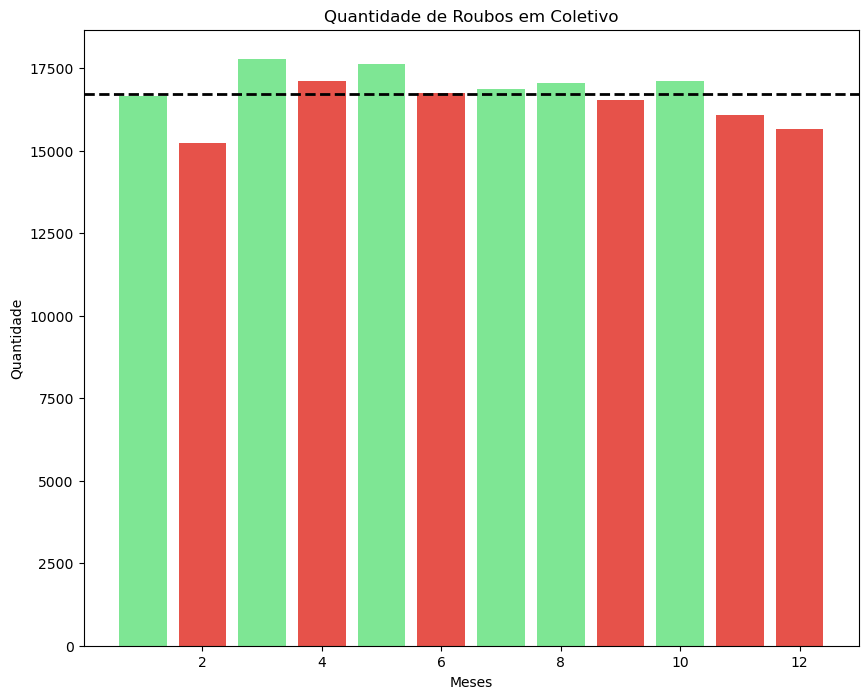

In [39]:
'''Qual é o mês (mes) com o maior número de ocorrências de roubo_em_coletivo?'''

plt.figure(figsize=(10,8))

media_mes_maior_ocorre_roubo_coletivo = mes_maior_ocorre_roubo_coletivo.mean()

cores = np.where(mes_maior_ocorre_roubo_coletivo.diff().fillna(0) >= 0, '#7EE694', '#E6524A')  
plt.bar(mes_maior_ocorre_roubo_coletivo.index, mes_maior_ocorre_roubo_coletivo.values,  color=cores)

plt.axhline(y=media_mes_maior_ocorre_roubo_coletivo, color='k', linestyle='--', linewidth=2, label='Média')

plt.title("Quantidade de Roubos em Coletivo")
plt.ylabel("Quantidade")
plt.xlabel("Meses")

plt.show()

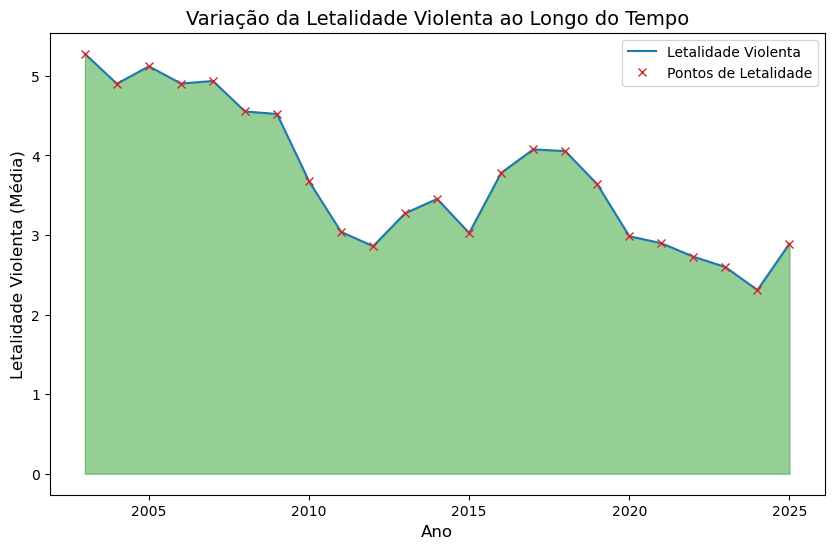

In [40]:
'''Como a taxa de letalidade_violenta varia ao longo do tempo?'''

letalidade_violenta_anos = baseDP.groupby('somente_ano')['letalidade_violenta'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(letalidade_violenta_anos.index, letalidade_violenta_anos.values, '-', color='tab:blue', label='Letalidade Violenta')
ax.fill_between(letalidade_violenta_anos.index, letalidade_violenta_anos.values, alpha=0.5, color='tab:green')
ax.plot(letalidade_violenta_anos.index, letalidade_violenta_anos.values, 'x', color='tab:red', label='Pontos de Letalidade')


ax.set_title("Variação da Letalidade Violenta ao Longo do Tempo", fontsize=14)
ax.set_xlabel("Ano", fontsize=12)
ax.set_ylabel("Letalidade Violenta (Média)", fontsize=12)
ax.legend()

plt.show()

AISP 12: Normalmente corresponde à Zona Oeste do Rio (incluindo bairros como Campo Grande, Santa Cruz, Paciência e Guaratiba).


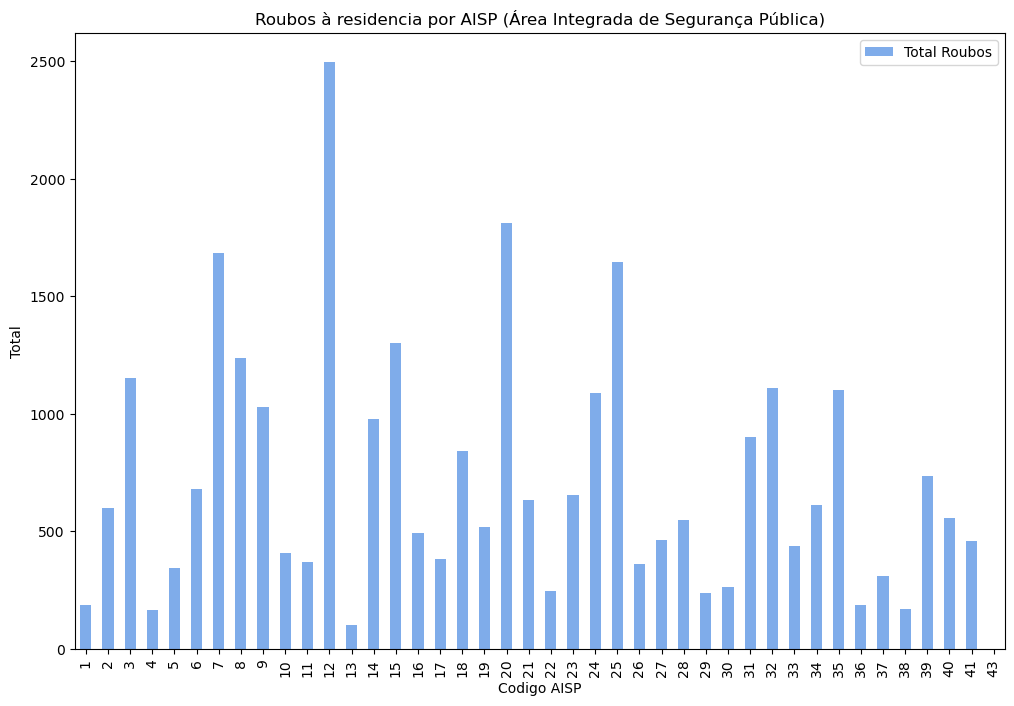

In [41]:
'''Qual aisp (aisp) tem a maior taxa de roubo_residencia?'''

roubo_residencia_por_aisp = baseDP.groupby('aisp')[['roubo_residencia']].sum()

roubo_residencia_por_aisp.plot(kind='bar', figsize=(12, 8), color=['#7FACEA', '#5060EA'])

print("AISP 12: Normalmente corresponde à Zona Oeste do Rio (incluindo bairros como Campo Grande, Santa Cruz, Paciência e Guaratiba).")

plt.title('Roubos à residencia por AISP (Área Integrada de Segurança Pública)')
plt.xlabel('Codigo AISP')
plt.ylabel('Total')
plt.legend(['Total Roubos'])

plt.show()

In [42]:
agrupado_por_regiao = baseDP.groupby('regiao').size()

print(agrupado_por_regiao)

regiao
Baixada Fluminense     4927
Capital               10705
Grande NiterÃ³i        2650
Interior              17388
dtype: int64


In [43]:
baseDP['regiao'] = baseDP['regiao'].replace({'Grande NiterÃ³i': 'Grande Niteroi'})

<Axes: ylabel='trafico_drogas'>

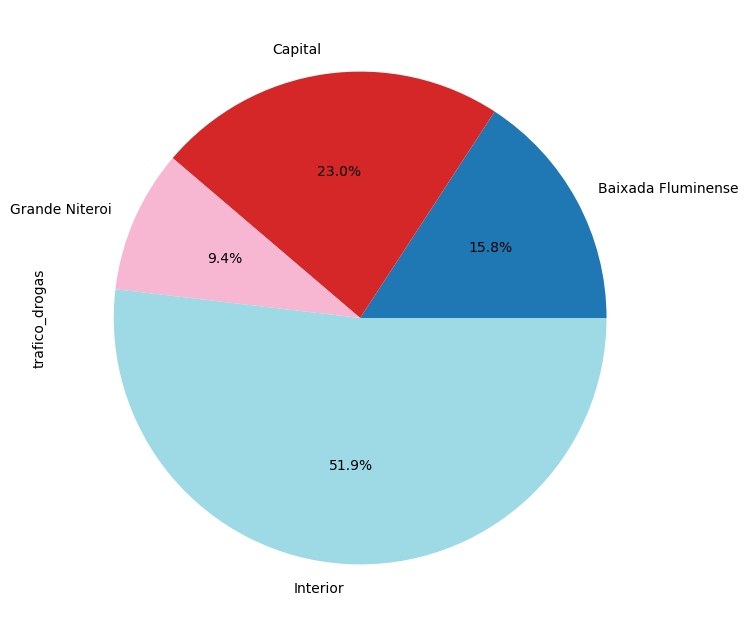

In [44]:
'Como a distribuição de trafico_drogas varia entre as regiões (regiao)?'

trafico_drogas_regiao = baseDP.groupby('regiao')[['trafico_drogas']].sum()
trafico_drogas_regiao.plot(kind='pie', y='trafico_drogas', figsize=(12, 8), autopct='%1.1f%%', legend=False, colormap='tab20')

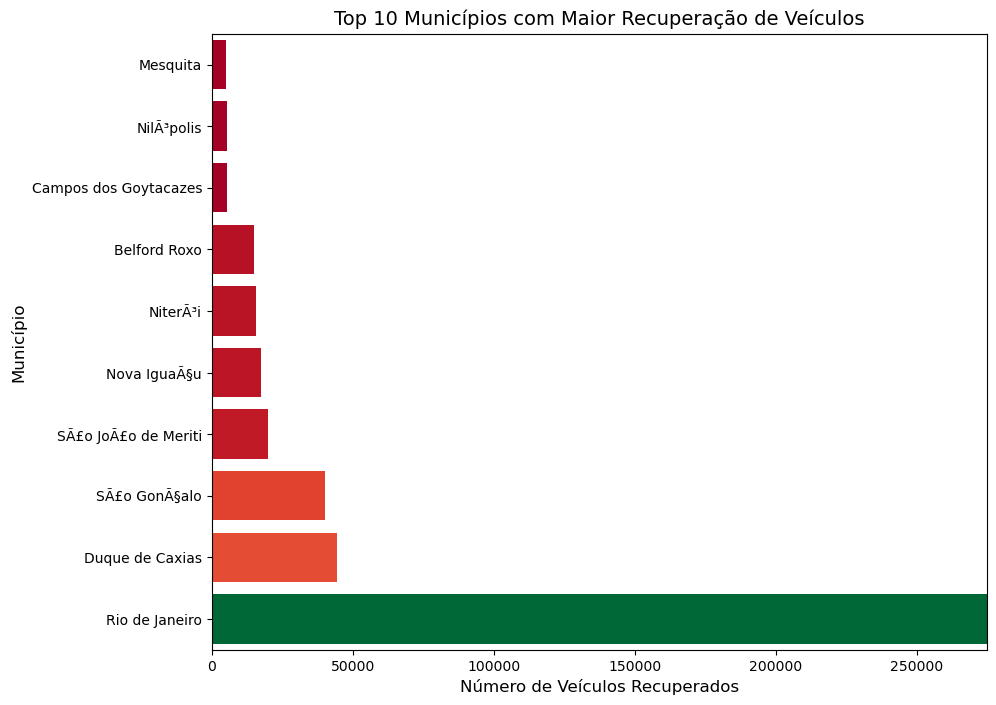

In [45]:
'''Qual município (munic) tem o maior número de recuperacao_veiculos?'''

maior_recuperacao_veiculo = baseDP.groupby('munic')['recuperacao_veiculos'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set(xlim=(0, maior_recuperacao_veiculo.max() + 10), ylim=(-0.5, len(maior_recuperacao_veiculo) - 0.5))

x = maior_recuperacao_veiculo.values
y = np.arange(len(maior_recuperacao_veiculo))
ax.barh(y, x, color=plt.cm.RdYlGn((x - x.min()) / (x.max() - x.min())))

ax.set_yticks(y)
ax.set_yticklabels(maior_recuperacao_veiculo.index)
ax.set_title("Top 10 Municípios com Maior Recuperação de Veículos", fontsize=14)
ax.set_xlabel("Número de Veículos Recuperados", fontsize=12)
ax.set_ylabel("Município", fontsize=12)

plt.show()

In [46]:
'''Há uma relação entre o aumento de roubo_celular e o aumento de furto_celular?'''

correlacao_roubo_furto_celular = baseDP['roubo_celular'].corr(baseDP['furto_celular'])

print(f"A correlação entre roubo_celular e furto_celular é: {correlacao_roubo_furto_celular:.2f}")

'''Próximo de 0: Pouca ou nenhuma correlação.
Entre 0.1 e 0.3: Correlação fraca.
Entre 0.3 e 0.7: Correlação moderada.
Entre 0.7 e 1.0: Correlação forte.
1.0: Correlação perfeita (as variáveis aumentam ou diminuem juntas de forma linear)'''

A correlação entre roubo_celular e furto_celular é: 0.41


'Próximo de 0: Pouca ou nenhuma correlação.\nEntre 0.1 e 0.3: Correlação fraca.\nEntre 0.3 e 0.7: Correlação moderada.\nEntre 0.7 e 1.0: Correlação forte.\n1.0: Correlação perfeita (as variáveis aumentam ou diminuem juntas de forma linear)'

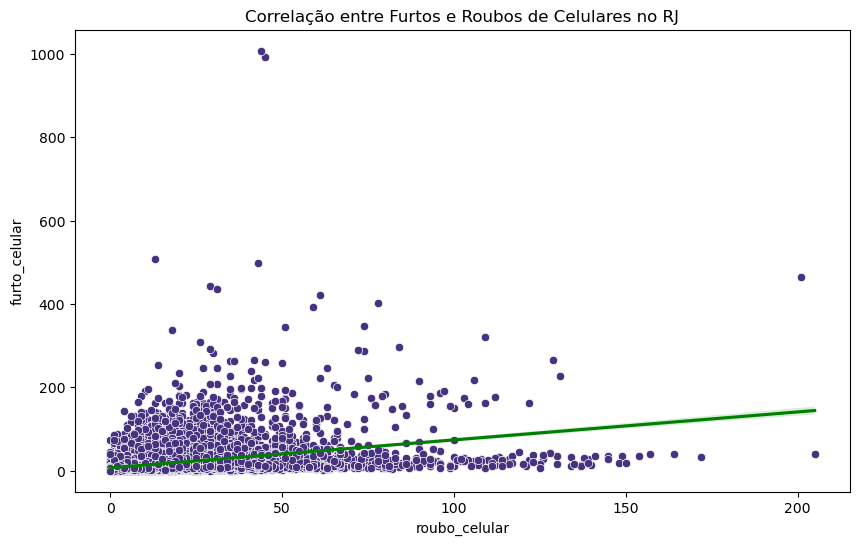

In [47]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=baseDP, x="roubo_celular", y="furto_celular")

sns.regplot(data=baseDP, x='roubo_celular', y='furto_celular', scatter=False, color='green')

plt.title("Correlação entre Furtos e Roubos de Celulares no RJ")

plt.show()

In [48]:
baseDP.head()

,cisp,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,lesao_corp_morte,...,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,Todos_roubos,Todos_furtos,somente_ano,mes
0,1,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,0,0,...,0,0,0,0,578,3,166,169,2003,1
1,4,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,0,1,0,0,441,3,133,115,2003,1
2,5,2003-01-01,2003-01-01,5,1,Rio de Janeiro,3304557,Capital,3,0,...,1,0,0,0,637,3,187,216,2003,1
3,6,2003-01-01,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,6,0,...,1,0,0,0,473,3,199,90,2003,1
4,7,2003-01-01,2003-01-01,1,1,Rio de Janeiro,3304557,Capital,4,0,...,3,0,0,0,147,3,60,35,2003,1


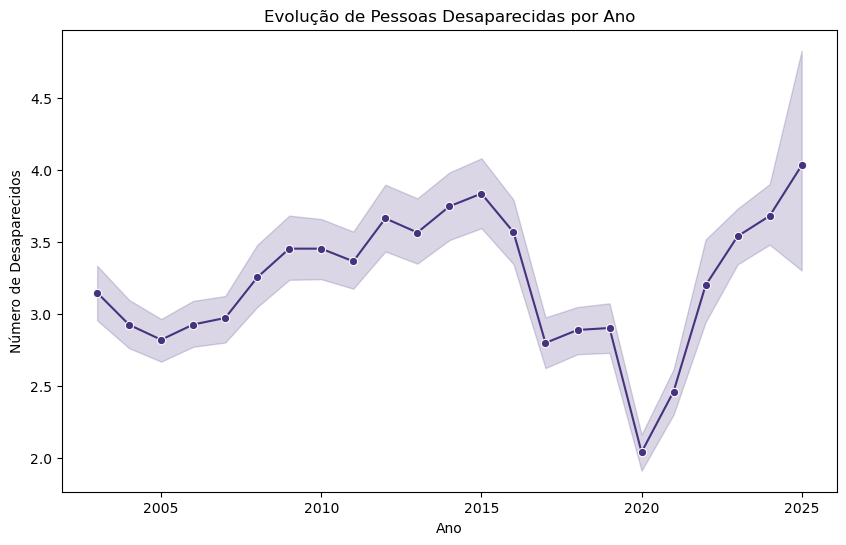

In [49]:
'''Como a quantidade de pessoas_desaparecidas varia ao longo dos anos?'''

plt.figure(figsize=(10, 6))
sns.lineplot(data=baseDP, x="somente_ano", y="pessoas_desaparecidas", marker='o')
plt.title("Evolução de Pessoas Desaparecidas por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Desaparecidos")

plt.show()

In [50]:
'''baseDP.to_csv('baseDP_modificado.csv', index=False)'''

"baseDP.to_csv('baseDP_modificado.csv', index=False)"